# Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [1]:
#Main libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline 

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Labs\lab-eda-univariate\amz_uk_price_prediction_dataset.csv")

### Part 1: Understanding Product Categories

In [6]:
df.shape

(2443651, 9)

In [6]:
df.head(5)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
frequency_table_category = df.category.value_counts()

In [8]:
proportion_table_category = df.category.value_counts(normalize=True)

In [9]:
final_table = pd.concat([frequency_table_category, proportion_table_category], axis=1)
final_table = final_table.sort_values(by="count", ascending= False)
final_table

,count,proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766
...,...,...
Alexa Built-In Devices,107,0.000044
Motorbike Chassis,107,0.000044
Plugs,107,0.000044


In [10]:
#Top 5 categories
top_5 = final_table[:5]
top_5.columns = ['absolute frequency', 'relative frequency']
top_5

,absolute frequency,relative frequency
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766


In [11]:
top_3 = top_5[:3]
top_3

,absolute frequency,relative frequency
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing, Shoes & Accessories",19229,0.007869


C:\Users\HP\AppData\Local\Temp\ipykernel_10008\3298981443.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5,


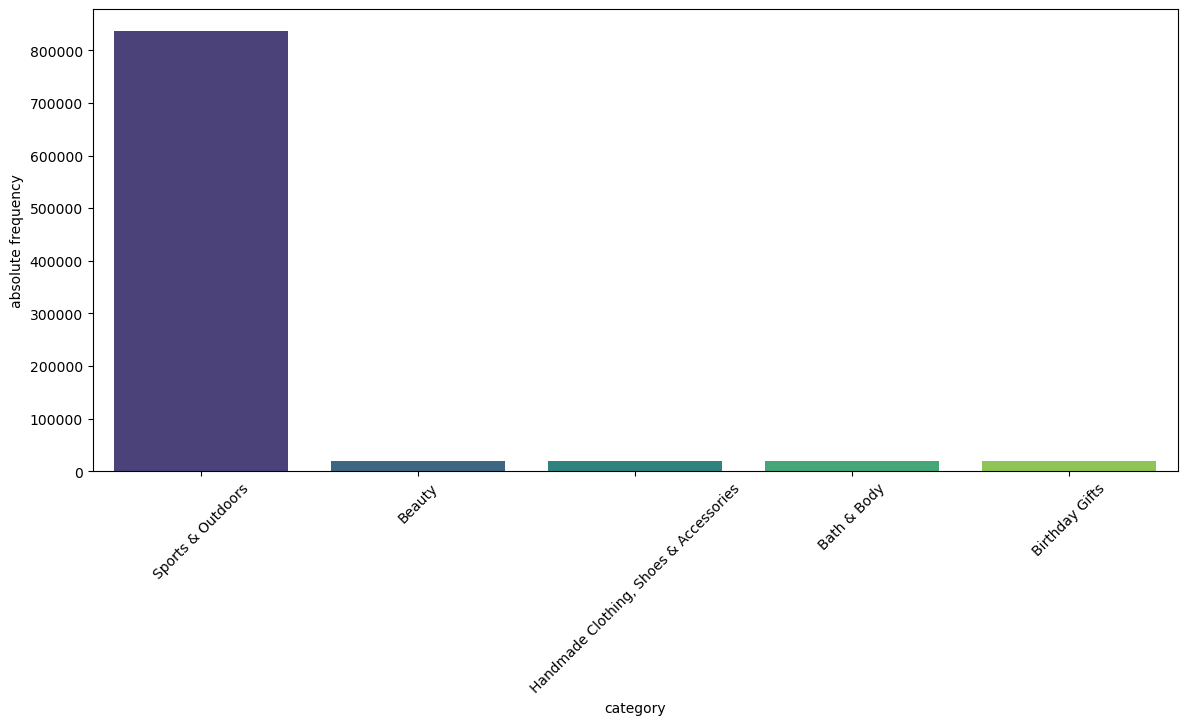

In [12]:
plt.figure(figsize=(14, 6)) 

sns.barplot(data=top_5,
            x="category",
            y="absolute frequency",
            palette='viridis')
plt.xticks(rotation=45) #this command will rotate the labels so that they become readable

plt.show()

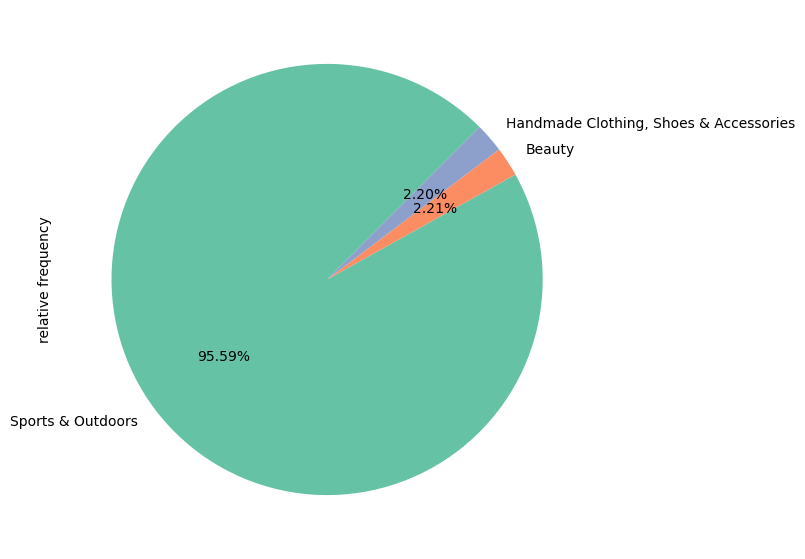

In [13]:
plt.figure(figsize=(8, 7))
top_3["relative frequency"].plot.pie(autopct='%1.2f%%' ,startangle=45, colors=sns.color_palette('Set2'))
plt.show()

###### Sports & Outdoors category clearly stands out from the rest.

### Part 2: Delving into Product Pricing

In [58]:
average_price = round(df.price.mean(), 2)
average_price

89.24

In [46]:
median_price = df.price.median()
median_price

19.09

In [50]:
mode_price = df.price.mode()
mode_price

0    9.99
Name: price, dtype: float64

###### The average price for the listed products equals to 89.24 £, whereas the most common price (mode) is 9.99 £. 
###### From this we may infer that even though the most frequent price is below 10 £, the predominance of several higher price products push the average almost to 90 £, 9 times higher.

In [68]:
price_std = round(df.price.std(), 2)
price_std

345.61

In [66]:
price_var = round(df.price.var(), 2)
price_var

119445.49

In [96]:
price_min = df.price.min()
price_max = df.price.max()
price_range = price_max - price_min
price_range

100000.0

In [88]:
price_max

100000.0

In [246]:
price_Q1 = df.price.quantile(0.25)
price_Q3 = df.price.quantile(0.75)
IQR_price = price_Q3 - price_Q1
IQR_price

36.0

###### Given the average price of 89.24 £, from a standard deviation equal to 345.61 we may infer that price values are widely spread out around the mean. 
###### However, given the IQR we can assume that this measure of dispersion is being highly affected by the highest price values in the top percentiles.

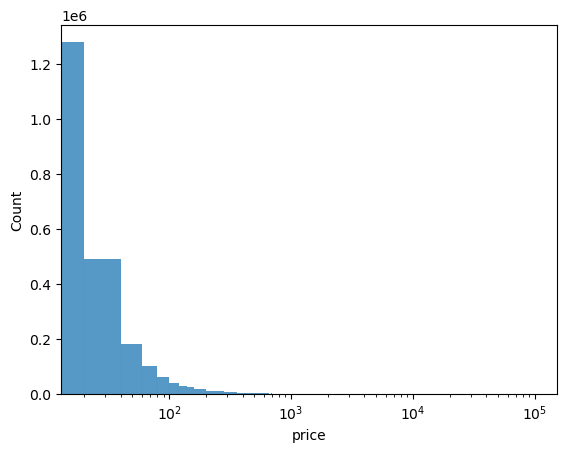

In [196]:
sns.histplot(df.price, bins=5000)
plt.xscale('log') #given the wide range of prices (from 0 to 100000 £) the logarithmic scale will give us an opportunity to better vizualize the price distribution in th lowest value region 
plt.show()

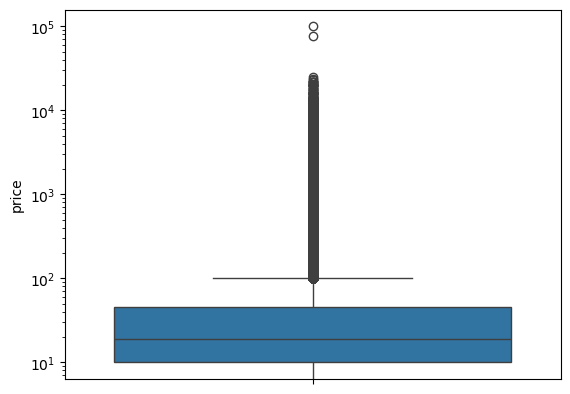

In [174]:
sns.boxplot(data=df.price)
plt.yscale('log') # the same scale vizualization opportunity as before 
plt.show()

###### From the boxplot we could assume that there is a significant amount of values above 100 £ (until 100 000 £) which could be considered to be outliers. 
###### This way we would fix our range vizualization difficulties and properly focus in the price values of interest.

### Part 3: Unpacking Product Ratings

In [218]:
df2 = df.copy()

In [228]:
#Given that a rating equal to 0.0 is meaningless, we will assume only stars rating different from 0.0
df2 = df2[df2["stars"]!= 0.0]

In [230]:
average_rating = round(df2.stars.mean(), 2)
average_rating

4.32

In [232]:
median_rating = df2.stars.median()
median_rating

4.4

In [234]:
mode_rating = df2.stars.mode()
mode_rating

0    4.5
Name: stars, dtype: float64

###### Given the rating mean (4.32), the most common rating (4.5) and that 50% of the ratings are above 4.4 stars, we may assume that there is a predominance of well rated products (ratings between 4 and 5 stars). 

In [240]:
std_rating = round(df2.stars.std(), 2)
std_rating

0.56

In [242]:
var_rating = round(df2.stars.var(), 2)
var_rating

0.31

In [252]:
rating_Q1 = df2.stars.quantile(0.25)
rating_Q3 = df2.stars.quantile(0.75)
IQR_rating = rating_Q3 - rating_Q1
IQR_rating

0.5

###### Given the standard deviation of 0.56 and the IQR of 0.5 we can assume that the ratings are highly concentrated around the 4.32 average rating and within the 4 to 5 stars interval.

In [262]:
df2.stars.skew().round(2)

-2.38

In [266]:
df2.stars.kurtosis().round(2)

9.78

###### From the negative skewness value(-2.38) we can assume that the mass of the distribution is concentrated on the right of the figure (high rating values).
###### Regarding the positive kurtosis we can assume that it has fatter tails and a sharper peak than the normal distribution.

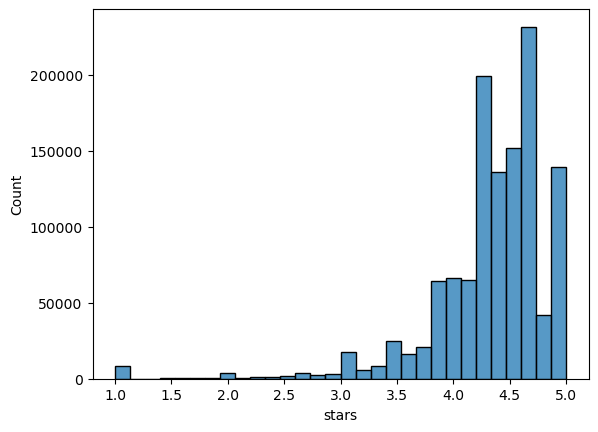

In [278]:
sns.histplot(df2.stars, bins=30)
plt.show()

###### As presented before, the histogram indicates a higher predominance in the 4 to 5 star rating interval. Keep in mind that we disregarded products with 0.0 rating. 